# Detectando Fake News relacionadas ao Covid-19 em tweets

## Trabalho Final - Aprendizado de Máquina

Equipe


*   Andreza Fernandes de Oliveira - 486243
*   Carolina Alves Ribeiro - 497769
*   Felipe Marcel de Queiroz Santos - 486344
*   Luís Gustavo Coutinho do Rêgo - 434729

*Gente, vamos escrever um resumo do trabalho aqui!!*

# 1. Importações

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import ast
import seaborn as sb
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Leitura dos dados

## a. Dataset original

In [ ]:
dado_bruto = pd.read_csv('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/02. Arquivos/Base de dados original.csv')
dado_bruto_tokens = pd.read_csv('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/02. Arquivos/01. Dados/fakenews_data_tokens.csv')

path = '/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/02. Arquivos/01. Dados/01. Dados para treino e teste/'
x_train_origin = pd.read_csv(path + 'x_train.csv')
x_test_origin = pd.read_csv(path + 'x_test.csv')
y_train_origin = pd.read_csv(path + 'y_train.csv', index_col=False)
y_test_origin = pd.read_csv(path + 'y_test.csv', index_col=False)

len(x_train_origin), len(x_test_origin), len(y_train_origin), len(y_test_origin)

(1106, 277, 1106, 277)

In [ ]:
dado_bruto_tokens

,text,classification,text_tokens
0,China se beneficiou financeiramente do novo co...,0,"['china', 'beneficiou', 'financeiramente', 'co..."
1,Alimentos alcalinos ajudam a prevenir ou trata...,0,"['alimentos', 'alcalinos', 'ajudam', 'prevenir..."
2,"Minas Gerais tem menos mortes que São Paulo, e...",0,"['minas', 'gerais', 'mortes', 'paulo', 'adotad..."
3,"Quando os sintomas do COVID-19 aparecerem, as ...",0,"['sintomas', 'covid', 'aparecerem', 'tomar', '..."
4,Beber água e fazer gargarejos com sal ou vinag...,0,"['beber', 'água', 'gargarejos', 'sal', 'vinagr..."
...,...,...,...
1378,Vídeo é usado fora de contexto para relacionar...,1,"['vídeo', 'usado', 'contexto', 'relacionar', '..."
1379,Vídeo engana ao atribuir protesto na Bélgica a...,1,"['vídeo', 'engana', 'atribuir', 'protesto', 'b..."
1380,Vídeo mostra FBI confiscando máscaras de acumu...,1,"['vídeo', 'mostra', 'fbi', 'confiscando', 'más..."
1381,Vídeo usa informações falsas para dizer que lo...,1,"['vídeo', 'informações', 'falsas', 'lockdown',..."


## b. Logs dos modelos gerados

In [ ]:
regressao_logistica = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/1. Regressão Logística/regressao_logistica.json')
discriminante_gaussiano = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/3. Análise Discriminante Gaussiano/agd.json')
arvore_decisao = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/5. Árvore de Decisão/ad.json')
random_forest = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/8. Random Forest/random_forest.json')
xgboost = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/10. XGBooster/xgbooster.json')
svm = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/7. SVM/svm.json')
knn = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/2. KNN/k_vizinhos_mais_proximos.json')
automl = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/9. AutoML/automl.json')
mlp = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/6. MLP/mlp.json')

In [ ]:
regressao_logistica_50dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/1. Regressão Logística/regressao_logistica_50dim.json')
discriminante_gaussiano_50dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/3. Análise Discriminante Gaussiano/agd_50dim.json')
arvore_decisao_50dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/5. Árvore de Decisão/ad_50dim.json')
random_forest_50dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/8. Random Forest/random_forest_50dim.json')
xgboost_50dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/10. XGBooster/xgbooster_50dim.json')
# svm_50dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/7. SVM/svm_50dim.json')
# mlp_50dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/11. MLP/mlp_50dim.json')

In [ ]:
regressao_logistica_100dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/1. Regressão Logística/regressao_logistica_100dim.json')
discriminante_gaussiano_100dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/3. Análise Discriminante Gaussiano/agd_100dim.json')
arvore_decisao_100dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/5. Árvore de Decisão/ad_100dim.json')
random_forest_100dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/8. Random Forest/random_forest_100dim.json')
xgboost_100dim = pd.read_json('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/05. Resultados/5.1. Resultados dos modelos/10. XGBooster/xgbooster_100dim.json')


# 3. Análise Exploratória dos Dados

## Colunas dos dados

In [ ]:
dado_bruto.columns

Index(['País', 'Idioma', 'Afirmação checada', 'Classificação', 'Descrição',
       'Data de publicação', 'Organização', 'Link para a checagem',
       'Tipo de informação', 'Formato', 'Tipo de checagem',
       'Publicação checada', 'Data em que a desinformação foi detectada',
       'Origem', 'Fonte', 'Foi atualizado ou corrigido?',
       'Outros países onde circulou'],
      dtype='object')

## Distribuição das classes 

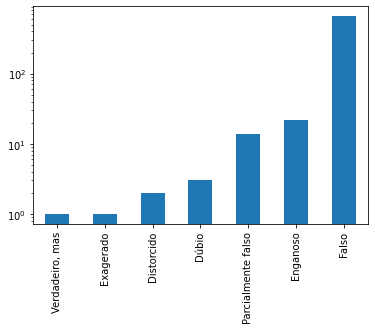

In [ ]:
# contagem das classes
plt.yscale("log")
dado_bruto['Classificação'].value_counts().sort_values().plot(kind = 'bar')

In [ ]:
df_tokenizado = dado_bruto_tokens
df_tokenizado['text_tokens'] = dado_bruto_tokens['text_tokens'].apply(lambda x: ast.literal_eval(x))
df_tokenizado_true = df_tokenizado[df_tokenizado['classification'] == 1]
df_tokenizado_false = df_tokenizado[df_tokenizado['classification'] == 0]

In [ ]:
def text_tokens(df):
    text_tokens = []
    text_tokens_set = []
  
    for tokens in df:
        text_tokens.extend(tokens)
      
    text_tokens_set.append((list(text_tokens)))
    return text_tokens_set

def text_tokens_set(df):
    text_tokens = []
    text_tokens_set = []
  
    for tokens in df:
        text_tokens.extend(tokens)
      
    text_tokens_set.append((list(set(text_tokens))))
    return text_tokens_set

tokens_true = text_tokens(df_tokenizado_true['text_tokens'])[0]
tokens_false = text_tokens(df_tokenizado_false['text_tokens'])[0]
print("Tamanhos do vocabulário do dataset (true): ", len(tokens_true))
print("Tamanhos do vocabulário do dataset (true): ", len(tokens_false))

separator = ' '
wordcloud = WordCloud(max_font_size=100).generate(separator.join(tokens_true))

Tamanhos do vocabulário do dataset (true):  6102
Tamanhos do vocabulário do dataset (true):  7075


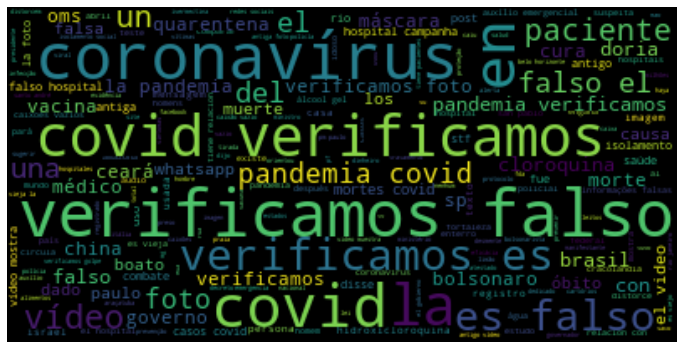

In [ ]:
separator = ' '
wordcloud = WordCloud(max_font_size=100).generate(separator.join(tokens_true))

plt.figure(figsize=(12,8)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloudtMostFrequencyTrueNews.png')
plt.show()

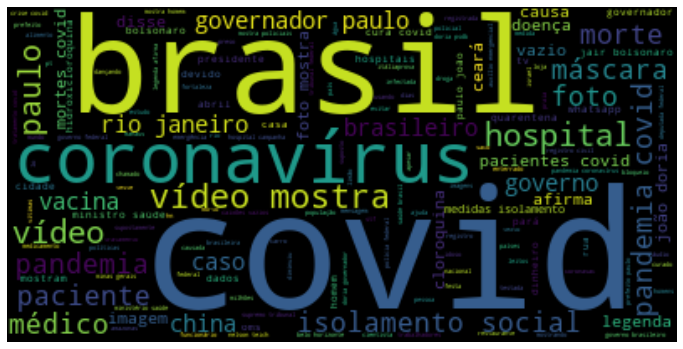

In [ ]:
separator = ' '
wordcloud = WordCloud(max_font_size=100).generate(separator.join(tokens_false))

plt.figure(figsize=(12,8)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloudtMostFrequencyFakeNews.png')
plt.show()

# 4. Análise das métricas

## Funções

In [34]:
def examples_confusion_matrix(classifier):
    y_score = classifier['y_predict'][0]

    matriz = {
        'TP': [],
        'TN': [],
        'FP': [],
        'FN': []
    }

    for index, y_real, y_pred  in zip(y_test_origin['Unnamed: 0'], y_test_origin['classification'], y_score):
        if(y_real == 1 and y_pred == 1): # TP: True News classificada como True news
            matriz['TP'].append(index)
        elif(y_real == 0 and y_pred == 0): # TN: Fake news classificada como Fake news
            matriz['TN'].append(index)
        elif(y_real == 1 and y_pred == 0): # FN: True New classificada como Fake New
            matriz['FN'].append(index)
        elif(y_real == 0 and y_pred == 1): # FP: Fake news classificada como True New
            matriz['FP'].append(index)

    print("\n---------- Exemplo True Positive: ----------\n ")
    print(dado_bruto_tokens.loc[matriz['TP'][0]].text)

    print("\n---------- Exemplo True Negative: ----------\n ")
    print(dado_bruto_tokens.loc[matriz['TN'][0]].text)

    print("\n---------- Exemplo False Positive: ----------\n ")
    print(dado_bruto_tokens.loc[matriz['FP'][0]].text)

    print("\n---------- Exemplo False Negative: ----------\n ")
    print(dado_bruto_tokens.loc[matriz['FN'][0]].text)

In [ ]:
def plot_confusion_matrix(Y_real, Y_pred, vmax=400, save_fig=False, path_file='confusion_matrix.png'):
    INDEX_CLASSES = {
        0: 'FAKE NEW',
        1: 'TRUE NEW',
    }

    y_real_modif = []
    y_pred_modif = []

    for row in Y_real:
        y_real_modif.append(INDEX_CLASSES[row])
    

    for row in Y_pred:
        y_pred_modif.append(INDEX_CLASSES[row])

    cm = confusion_matrix(y_real_modif, y_pred_modif)
    cm_df = pd.DataFrame(cm, index = np.unique(y_real_modif), columns = np.unique(y_real_modif))

    # plt.figure(figsize=(5,5))
    sb.heatmap(cm_df, annot=True, fmt="d", annot_kws={"size": 12},  linewidths=0.5, vmax=vmax)
    
    if save_fig:
        plt.savefig(path_file)

def plot_curve_roc(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def highlight_max(s):
  is_max = s == s.max()
  return ['background-color: lightgreen' if v else '' for v in is_max]
  
def highlight_max_measure_values(df):
  return df.style.apply(highlight_max, axis=1)

## 1. Regressão Logística

### a. Word embedding com 300 dimensões

In [35]:
examples_confusion_matrix(regressao_logistica)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Coronavírus: conheça as correntes com informações falsas que circulam pelo WhatsApp

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


In [ ]:
n_classes = 2
y_test = regressao_logistica['y_real'][0]
y_score = regressao_logistica['y_predict'][0]

print("------- REGRESSÃO LOGÍSTICA -------")
print("\nHiperparametros: ", regressao_logistica['hiperparams'][0])
print('\nPrecisão: ', regressao_logistica['precision'][0])
print('\nRecall: ', regressao_logistica['recall'][0])
print('\nF1-Score: ', regressao_logistica['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- REGRESSÃO LOGÍSTICA -------

Hiperparametros:  {'alpha': 5}

Precisão:  0.8597792903

Recall:  0.8375451264

F1-Score:  0.8364234733

Acurária:  0.8375451263537906

ROC:  0.844270015698587


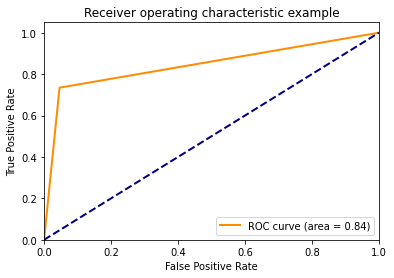

In [ ]:
plot_curve_roc(y_test, y_score)

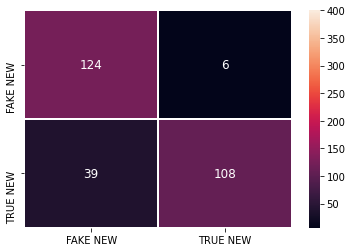

In [ ]:
plot_confusion_matrix(regressao_logistica['y_real'][0], regressao_logistica['y_predict'][0])

### b. Word embedding com 50 dimensões

In [ ]:
n_classes = 2
y_test = regressao_logistica_50dim['y_real'][0]
y_score = regressao_logistica_50dim['y_predict'][0]

print("------- REGRESSÃO LOGÍSTICA -------")
print("\nHiperparametros: ", regressao_logistica_50dim['hiperparams'][0])
print('\nPrecisão: ', regressao_logistica_50dim['precision'][0])
print('\nRecall: ', regressao_logistica_50dim['recall'][0])
print('\nF1-Score: ', regressao_logistica_50dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- REGRESSÃO LOGÍSTICA -------

Hiperparametros:  {'alpha': 3}

Precisão:  0.7737667562

Recall:  0.7292418773

F1-Score:  0.7223933296

Acurária:  0.7292418772563177

ROC:  0.7400052328623757


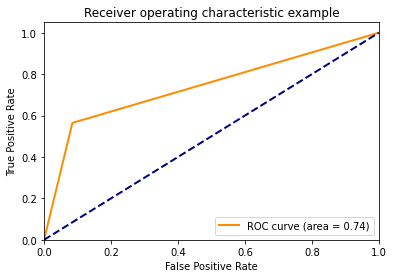

In [ ]:
plot_curve_roc(y_test, y_score)

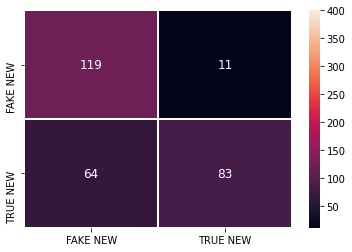

In [ ]:
plot_confusion_matrix(regressao_logistica_50dim['y_real'][0], regressao_logistica_50dim['y_predict'][0])

In [36]:
examples_confusion_matrix(regressao_logistica_50dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: É falso que total de mortes por Covid-19 foi revisado para 26 em SP

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
OMS tem diretrizes que incentivam a masturbação infantil

---------- Exemplo False Negative: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19


### c. Word embedding com 100 dimensões

In [ ]:
n_classes = 2
y_test = regressao_logistica_100dim['y_real'][0]
y_score = regressao_logistica_100dim['y_predict'][0]

print("------- REGRESSÃO LOGÍSTICA -------")
print("\nHiperparametros: ", regressao_logistica_100dim['hiperparams'][0])
print('\nPrecisão: ', regressao_logistica_100dim['precision'][0])
print('\nRecall: ', regressao_logistica_100dim['recall'][0])
print('\nF1-Score: ', regressao_logistica_100dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- REGRESSÃO LOGÍSTICA -------

Hiperparametros:  {'alpha': 10}

Precisão:  0.8024701616000001

Recall:  0.725631769

F1-Score:  0.7127957417

Acurária:  0.7256317689530686

ROC:  0.7397174254317112


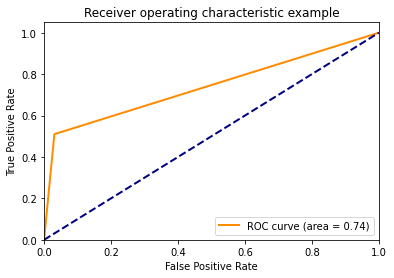

In [ ]:
plot_curve_roc(y_test, y_score)

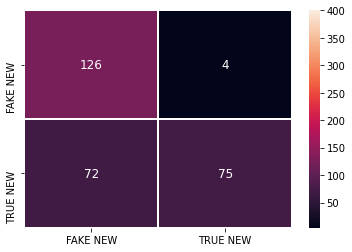

In [ ]:
plot_confusion_matrix(regressao_logistica_100dim['y_real'][0], regressao_logistica_100dim['y_predict'][0])

In [37]:
examples_confusion_matrix(regressao_logistica_100dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: É falso que total de mortes por Covid-19 foi revisado para 26 em SP

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Coronavírus: conheça as correntes com informações falsas que circulam pelo WhatsApp

---------- Exemplo False Negative: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19


## 2. k-NN

In [ ]:
y_test = knn['y_real'][0]
y_score = knn['y_predict'][0]

print("------- KNN -------")
print('\nPrecisão: ', knn['precision'][0])
print('\nRecall: ', knn['recall'][0])
print('\nF1-Score: ', knn['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- KNN -------

Precisão:  0.7575338283

Recall:  0.7472924188000001

F1-Score:  0.7467387558

Acurária:  0.7472924187725631

ROC:  0.7516745159602302


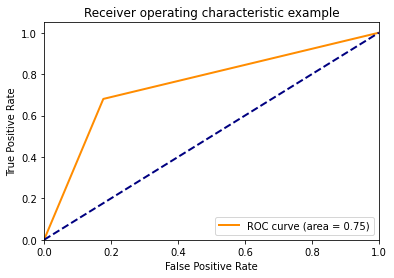

In [ ]:
plot_curve_roc(y_test, y_score)

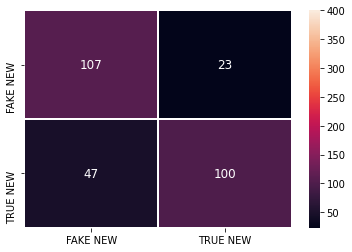

In [ ]:
plot_confusion_matrix(knn['y_real'][0], knn['y_predict'][0])

In [38]:
examples_confusion_matrix(knn)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Você pode autodiagnosticar o COVID-19 prendendo a respiração por 10 segundos e evitar o COVID-19 bebendo água constantemente. COVID-19 causa fibrose nos pulmões.

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


## 3. Análise Discriminante Gaussiano

### a. Word embedding com 300 dimensões

In [ ]:
y_test = discriminante_gaussiano['y_real'][0]
y_score = discriminante_gaussiano['y_predict'][0]

print("------- ANÁLISE DISCRIMINANTE GAUSSIANO -------")
print('\nPrecisão: ', discriminante_gaussiano['precision'][0])
print('\nRecall: ', discriminante_gaussiano['recall'][0])
print('\nF1-Score: ', discriminante_gaussiano['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- ANÁLISE DISCRIMINANTE GAUSSIANO -------

Precisão:  0.860132054

Recall:  0.8555956679000001

F1-Score:  0.8556747213

Acurária:  0.855595667870036

ROC:  0.8581632653061225


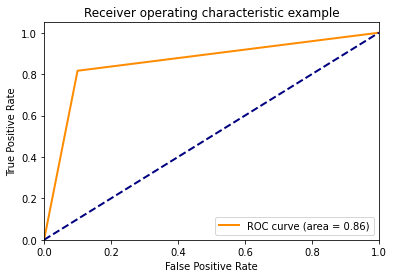

In [ ]:
plot_curve_roc(y_test, y_score)

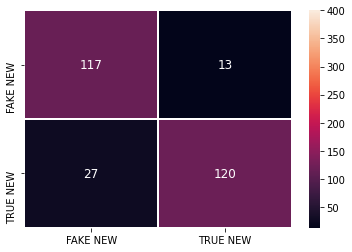

In [ ]:
plot_confusion_matrix(discriminante_gaussiano['y_real'][0], discriminante_gaussiano['y_predict'][0])

In [39]:
examples_confusion_matrix(discriminante_gaussiano)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Vídeo de um confronto na Cracolândia durante a pandemia de Covid-19

---------- Exemplo False Negative: ----------
 
Vídeos de Osmar Terra são compartilhados como se fossem do ex-ministro Adib Jatene


### b. Word embedding com 50 dimensões

In [ ]:
y_test = discriminante_gaussiano_50dim['y_real'][0]
y_score = discriminante_gaussiano_50dim['y_predict'][0]

print("------- ANÁLISE DISCRIMINANTE GAUSSIANO -------")
print('\nPrecisão: ', discriminante_gaussiano_50dim['precision'][0])
print('\nRecall: ', discriminante_gaussiano_50dim['recall'][0])
print('\nF1-Score: ', discriminante_gaussiano_50dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- ANÁLISE DISCRIMINANTE GAUSSIANO -------

Precisão:  0.8085952420000001

Recall:  0.8086642599

F1-Score:  0.8086191838

Acurária:  0.8086642599277978

ROC:  0.8077184720041862


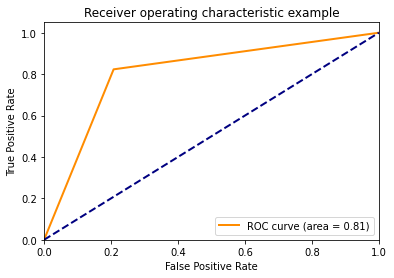

In [ ]:
plot_curve_roc(y_test, y_score)

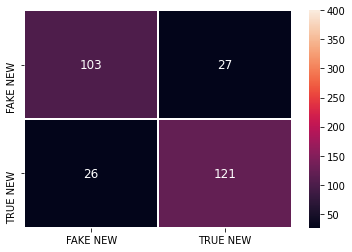

In [ ]:
plot_confusion_matrix(discriminante_gaussiano_50dim['y_real'][0], discriminante_gaussiano_50dim['y_predict'][0])

In [40]:
examples_confusion_matrix(discriminante_gaussiano_50dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
OMS tem diretrizes que incentivam a masturbação infantil

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


### c. Word embedding com 100 dimensões

In [ ]:
y_test = discriminante_gaussiano_100dim['y_real'][0]
y_score = discriminante_gaussiano_100dim['y_predict'][0]

print("------- ANÁLISE DISCRIMINANTE GAUSSIANO -------")
print('\nPrecisão: ', discriminante_gaussiano_100dim['precision'][0])
print('\nRecall: ', discriminante_gaussiano_100dim['recall'][0])
print('\nF1-Score: ', discriminante_gaussiano_100dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- ANÁLISE DISCRIMINANTE GAUSSIANO -------

Precisão:  0.8159828173

Recall:  0.8158844765000001

F1-Score:  0.815922998

Acurária:  0.8158844765342961

ROC:  0.815410779696494


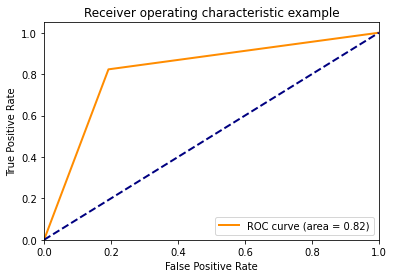

In [ ]:
plot_curve_roc(y_test, y_score)

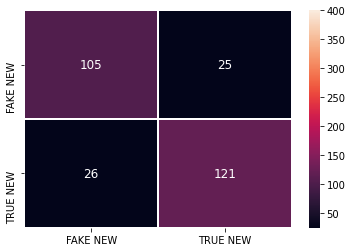

In [ ]:
plot_confusion_matrix(discriminante_gaussiano_100dim['y_real'][0], discriminante_gaussiano_100dim['y_predict'][0])

In [41]:
examples_confusion_matrix(discriminante_gaussiano_100dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Hospitais brasileiros recebem R$ 18.000 por óbito registrado devido à COVID-19.

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


## 4. Árvore de Decisão

### a. Word embedding com 300 dimensões

In [ ]:
y_test = arvore_decisao['y_real'][0]
y_score = arvore_decisao['y_predict'][0]

print("------- ÁRVORE DE DECISÃO-------")
print("\nHiperparametros: ", arvore_decisao['hiperparams'][0])
print('\nPrecisão: ', arvore_decisao['precision'][0])
print('\nRecall: ', arvore_decisao['recall'][0])
print('\nF1-Score: ', arvore_decisao['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- ÁRVORE DE DECISÃO-------

Hiperparametros:  {'criterion': 'entropy', 'max_depth': 40}

Precisão:  0.7291333395

Recall:  0.7292418773

F1-Score:  0.7291780903

Acurária:  0.7292418772563177

ROC:  0.7279958137100994


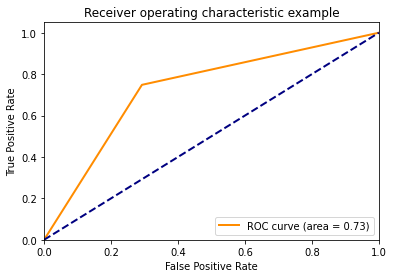

In [ ]:
plot_curve_roc(y_test, y_score)

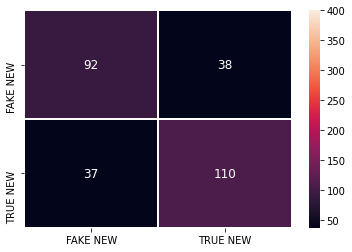

In [ ]:
plot_confusion_matrix(arvore_decisao['y_real'][0], arvore_decisao['y_predict'][0])

In [42]:
examples_confusion_matrix(arvore_decisao)


---------- Exemplo True Positive: ----------
 
 #Verificamos: É falso que total de mortes por Covid-19 foi revisado para 26 em SP

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
OMS tem diretrizes que incentivam a masturbação infantil

---------- Exemplo False Negative: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19


### b. Word embedding com 50 dimensões

In [ ]:
y_test = arvore_decisao_50dim['y_real'][0]
y_score = arvore_decisao_50dim['y_predict'][0]

print("------- ÁRVORE DE DECISÃO-------")
print("\nHiperparametros: ", arvore_decisao_50dim['hiperparams'][0])
print('\nPrecisão: ', arvore_decisao_50dim['precision'][0])
print('\nRecall: ', arvore_decisao_50dim['recall'][0])
print('\nF1-Score: ', arvore_decisao_50dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- ÁRVORE DE DECISÃO-------

Hiperparametros:  {'criterion': 'entropy', 'max_depth': 10}

Precisão:  0.6891359501000001

Recall:  0.6895306859

F1-Score:  0.6884277028

Acurária:  0.6895306859205776

ROC:  0.6861329147043433


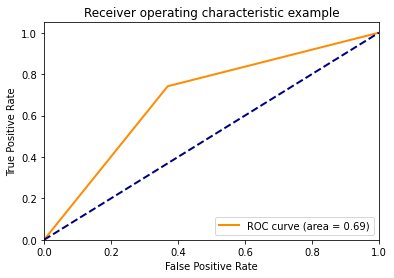

In [ ]:
plot_curve_roc(y_test, y_score)

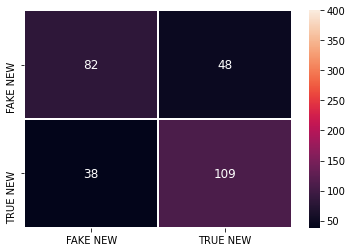

In [ ]:
plot_confusion_matrix(arvore_decisao_50dim['y_real'][0], arvore_decisao_50dim['y_predict'][0])

In [43]:
examples_confusion_matrix(arvore_decisao_50dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Vídeo de um confronto na Cracolândia durante a pandemia de Covid-19

---------- Exemplo False Negative: ----------
 
 #Verificamos: É falso que total de mortes por Covid-19 foi revisado para 26 em SP


### c. Word embedding com 100 dimensões

In [ ]:
y_test = arvore_decisao_100dim['y_real'][0]
y_score = arvore_decisao_100dim['y_predict'][0]

print("------- ÁRVORE DE DECISÃO-------")
print("\nHiperparametros: ", arvore_decisao_100dim['hiperparams'][0])
print('\nPrecisão: ', arvore_decisao_100dim['precision'][0])
print('\nRecall: ', arvore_decisao_100dim['recall'][0])
print('\nF1-Score: ', arvore_decisao_100dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- ÁRVORE DE DECISÃO-------

Hiperparametros:  {'criterion': 'gini', 'max_depth': 50}

Precisão:  0.7182063637

Recall:  0.7184115523

F1-Score:  0.7182714366

Acurária:  0.7184115523465704

ROC:  0.7169021454735741


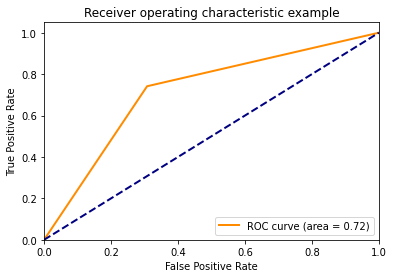

In [ ]:
plot_curve_roc(y_test, y_score)

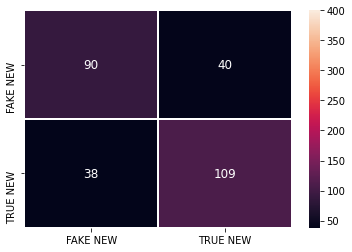

In [ ]:
plot_confusion_matrix(arvore_decisao_100dim['y_real'][0], arvore_decisao_100dim['y_predict'][0])

In [44]:
examples_confusion_matrix(arvore_decisao_100dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Vídeo de um confronto na Cracolândia durante a pandemia de Covid-19

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


## 5. Random Forest

### a. Word embedding com 300 dimensões

In [ ]:
y_test = random_forest['y_real'][0]
y_score = random_forest['y_predict'][0]

print("------- RANDOM FOREST -------")
print("\nHiperparametros: ", random_forest['hiperparams'][0])
print('\nPrecisão: ', random_forest['precision'][0])
print('\nRecall: ', random_forest['recall'][0])
print('\nF1-Score: ', random_forest['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- RANDOM FOREST -------

Hiperparametros:  {'criterion': 'gini', 'max_depth': 45, 'n_estimators': 120}

Precisão:  0.8176138220000001

Recall:  0.8086642599

F1-Score:  0.8084547491

Acurária:  0.8086642599277978

ROC:  0.812611198325484


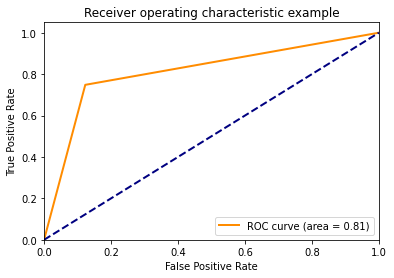

In [ ]:
plot_curve_roc(y_test, y_score)

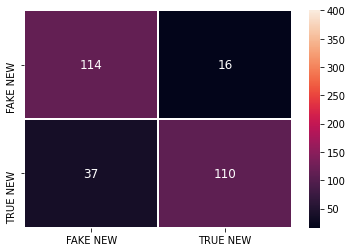

In [ ]:
plot_confusion_matrix(random_forest['y_real'][0], random_forest['y_predict'][0])

In [45]:
examples_confusion_matrix(random_forest)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
OMS tem diretrizes que incentivam a masturbação infantil

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


### b. Word embedding com 50 dimensões

In [ ]:
y_test = random_forest_50dim['y_real'][0]
y_score = random_forest_50dim['y_predict'][0]

print("------- RANDOM FOREST -------")
print("\nHiperparametros: ", random_forest_50dim['hiperparams'][0])
print('\nPrecisão: ', random_forest_50dim['precision'][0])
print('\nRecall: ', random_forest_50dim['recall'][0])
print('\nF1-Score: ', random_forest_50dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- RANDOM FOREST -------

Hiperparametros:  {'criterion': 'entropy', 'max_depth': 10}

Precisão:  0.6854455030000001

Recall:  0.6859205776

F1-Score:  0.6849542175000001

Acurária:  0.6859205776173285

ROC:  0.6827315541601255


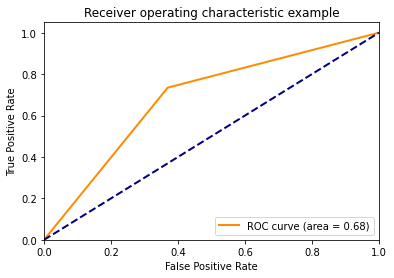

In [ ]:
plot_curve_roc(y_test, y_score)

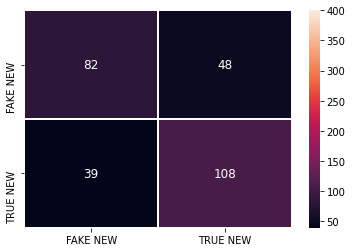

In [ ]:
plot_confusion_matrix(random_forest_50dim['y_real'][0], random_forest_50dim['y_predict'][0])

In [46]:
examples_confusion_matrix(random_forest_50dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Vídeo de um confronto na Cracolândia durante a pandemia de Covid-19

---------- Exemplo False Negative: ----------
 
 #Verificamos: É falso que total de mortes por Covid-19 foi revisado para 26 em SP


### c. Word embedding com 100 dimensões

In [ ]:
y_test = random_forest_100dim['y_real'][0]
y_score = random_forest_100dim['y_predict'][0]

print("------- RANDOM FOREST -------")
print("\nHiperparametros: ", random_forest_100dim['hiperparams'][0])
print('\nPrecisão: ', random_forest_100dim['precision'][0])
print('\nRecall: ', random_forest_100dim['recall'][0])
print('\nF1-Score: ', random_forest_100dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- RANDOM FOREST -------

Hiperparametros:  {'criterion': 'gini', 'max_depth': 45}

Precisão:  0.6792121323

Recall:  0.6787003610000001

F1-Score:  0.6788766848000001

Acurária:  0.6787003610108303

ROC:  0.6781527995813711


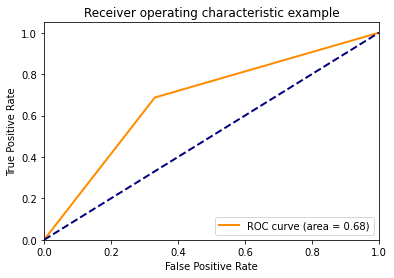

In [ ]:
plot_curve_roc(y_test, y_score)

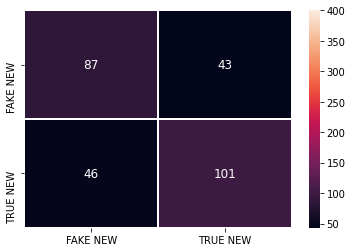

In [ ]:
plot_confusion_matrix(random_forest_100dim['y_real'][0], random_forest_100dim['y_predict'][0])

In [47]:
examples_confusion_matrix(random_forest_100dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Vídeo de um confronto na Cracolândia durante a pandemia de Covid-19

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


## 6. SVM

In [ ]:
y_test = svm['y_real'][0]
y_score = svm['y_predict'][0]

print("------- SVM -------")
print("\nHiperparametros: ", svm['hiperparams'][0])
print('\nPrecisão: ', svm['precision'][0])
print('\nRecall: ', svm['recall'][0])
print('\nF1-Score: ', svm['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- SVM -------

Hiperparametros:  {'C': 0.1, 'kernel': 'linear'}

Precisão:  0.8422181608

Recall:  0.8411552347

F1-Score:  0.8412920840000001

Acurária:  0.8411552346570397

ROC:  0.8418890633176348


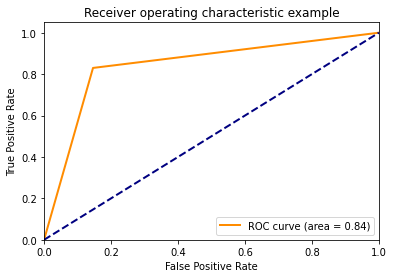

In [ ]:
plot_curve_roc(y_test, y_score)

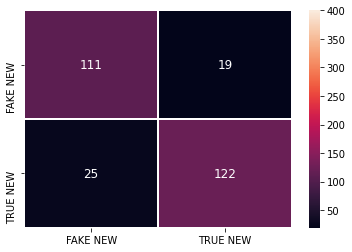

In [ ]:
plot_confusion_matrix(svm['y_real'][0], svm['y_predict'][0])

In [48]:
examples_confusion_matrix(svm)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
OMS tem diretrizes que incentivam a masturbação infantil

---------- Exemplo False Negative: ----------
 
Vídeos de Osmar Terra são compartilhados como se fossem do ex-ministro Adib Jatene


## 7. XGBOOST

### a. Word embedding com 300 dimensões

In [ ]:
y_test = xgboost['y_real'][0]
y_score = xgboost['y_predict'][0]

print("------- XGBOOST -------")
print("\nHiperparametros: ", xgboost['hiperparams'][0])
print('\nPrecisão: ', xgboost['precision'][0])
print('\nRecall: ', xgboost['recall'][0])
print('\nF1-Score: ', xgboost['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- XGBOOST -------

Hiperparametros:  {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400, 'reg_lambda': 1, 'subsample': 0.6}

Precisão:  0.8677764895000001

Recall:  0.8664259928

F1-Score:  0.8665480116000001

Acurária:  0.8664259927797834

ROC:  0.8674777603349031


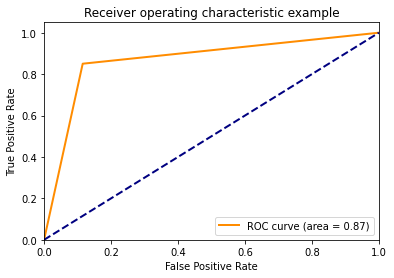

In [ ]:
plot_curve_roc(y_test, y_score)

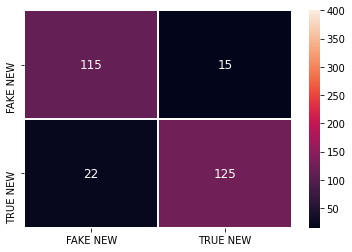

In [ ]:
plot_confusion_matrix(xgboost['y_real'][0], xgboost['y_predict'][0])

In [49]:
examples_confusion_matrix(xgboost)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
OMS tem diretrizes que incentivam a masturbação infantil

---------- Exemplo False Negative: ----------
 
Vídeos de Osmar Terra são compartilhados como se fossem do ex-ministro Adib Jatene


### b. Word embeddings com 50 dimensões

In [ ]:
y_test = xgboost_50dim['y_real'][0]
y_score = xgboost_50dim['y_predict'][0]

print("------- XGBOOST -------")
print("\nHiperparametros: ", xgboost_50dim['hiperparams'][0])
print('\nPrecisão: ', xgboost_50dim['precision'][0])
print('\nRecall: ', xgboost_50dim['recall'][0])
print('\nF1-Score: ', xgboost_50dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- XGBOOST -------

Hiperparametros:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.6}

Precisão:  0.8197216784

Recall:  0.8194945848

F1-Score:  0.8195653676

Acurária:  0.8194945848375451

ROC:  0.8192569335426478


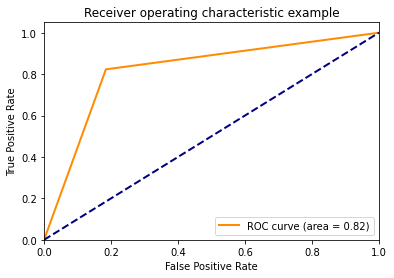

In [ ]:
plot_curve_roc(y_test, y_score)

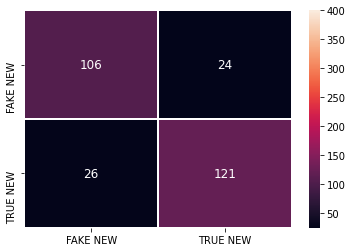

In [ ]:
plot_confusion_matrix(xgboost_50dim['y_real'][0], xgboost_50dim['y_predict'][0])

In [50]:
examples_confusion_matrix(xgboost_50dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Hospitais brasileiros recebem R$ 18.000 por óbito registrado devido à COVID-19.

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


### c. Word embeddings com 100 dimensões

In [ ]:
y_test = xgboost_100dim['y_real'][0]
y_score = xgboost_100dim['y_predict'][0]

print("------- XGBOOST -------")
print("\nHiperparametros: ", xgboost_100dim['hiperparams'][0])
print('\nPrecisão: ', xgboost_100dim['precision'][0])
print('\nRecall: ', xgboost_100dim['recall'][0])
print('\nF1-Score: ', xgboost_100dim['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- XGBOOST -------

Hiperparametros:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400, 'reg_lambda': 1.5, 'subsample': 0.8}

Precisão:  0.8345085057

Recall:  0.8339350181

F1-Score:  0.8340478104

Acurária:  0.8339350180505415

ROC:  0.834196755625327


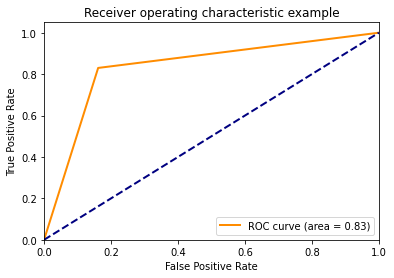

In [ ]:
plot_curve_roc(y_test, y_score)

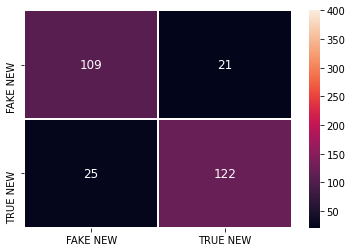

In [ ]:
plot_confusion_matrix(xgboost_100dim['y_real'][0], xgboost_100dim['y_predict'][0])

In [51]:
examples_confusion_matrix(xgboost_100dim)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
OMS tem diretrizes que incentivam a masturbação infantil

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais


# 9. MLP

In [ ]:
y_test = mlp['y_real'][0]
y_score = mlp['y_predict'][0]

print("------- MLP -------")
print("\nHiperparametros: ", mlp['hiperparams'][0])
print('\nPrecisão: ', mlp['precision'][0])
print('\nRecall: ', mlp['recall'][0])
print('\nF1-Score: ', mlp['f1score'][0])
print('\nAcurária: ', accuracy_score(y_test, y_score))
print('\nROC: ', roc_auc_score(y_test, y_score))

------- MLP -------

Hiperparametros:  {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}

Precisão:  0.8376349732

Recall:  0.8375451264

F1-Score:  0.8375791158

Acurária:  0.8375451263537906

ROC:  0.8371533228676086


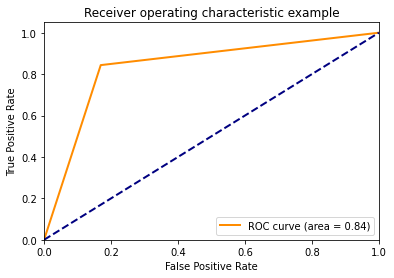

In [ ]:
plot_curve_roc(y_test, y_score)

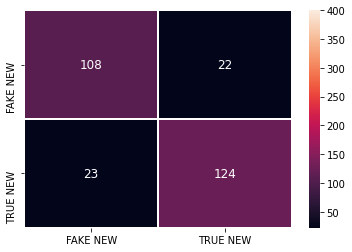

In [ ]:
plot_confusion_matrix(mlp['y_real'][0], mlp['y_predict'][0])

In [52]:
examples_confusion_matrix(mlp)


---------- Exemplo True Positive: ----------
 
 #Verificamos: Vídeo de confronto entre ambulantes e fiscais em SP é antigo e não tem relação com Covid-19

---------- Exemplo True Negative: ----------
 
Vídeo mostra policiais espancando uma mulher. Conforme a legenda, são policiais militares de São Paulo e estão espancando-a porque ela violou o isolamento social.

---------- Exemplo False Positive: ----------
 
Hospitais brasileiros recebem R$ 18.000 por óbito registrado devido à COVID-19.

---------- Exemplo False Negative: ----------
 
Não existe a taxa de sobrevivência à Covid-19 citada em posts nas redes sociais
